In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,roc_auc_score,confusion_matrix

In [0]:
#No. 10 (todo exceto letras G e I);
#No. 11 (todo exceto letra G);
#No. 13 (todo menos KNN).

In [44]:
#No. 10:

weekly = pd.read_csv('https://raw.githubusercontent.com/tonnioo/scripts_e_vagabundagens/master/Weekly.csv')
weekly = weekly.iloc[:,:] #tira coluna 0
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [45]:
weekly.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,545.000000,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,314.511526,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1.000000,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,273.000000,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,545.000000,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,817.000000,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,1089.000000,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [46]:
#(a)


rel_freq_by_year = weekly.Year.groupby(weekly.Year).value_counts()
cum_freq_by_year = rel_freq_by_year.cumsum()

cum_freq_by_year

Year  Year
1990  1990      47
1991  1991      99
1992  1992     151
1993  1993     203
1994  1994     255
1995  1995     307
1996  1996     360
1997  1997     412
1998  1998     464
1999  1999     516
2000  2000     568
2001  2001     620
2002  2002     672
2003  2003     724
2004  2004     776
2005  2005     828
2006  2006     880
2007  2007     933
2008  2008     985
2009  2009    1037
2010  2010    1089
Name: Year, dtype: int64

**Oscillating Indicators of Percentage of Return for weekly stock data (1990-2010):**

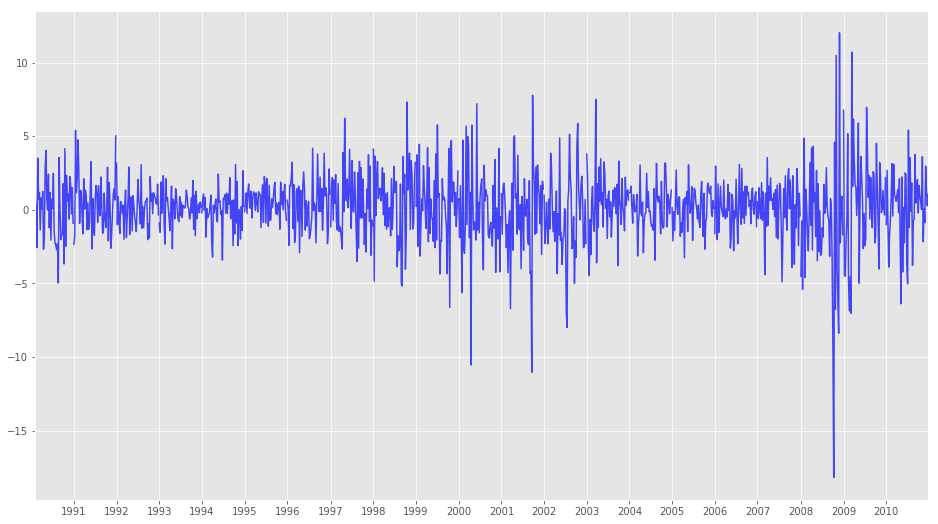

In [47]:
fig, ax = plt.subplots(figsize=(16,9))

for year in weekly.Year.unique():
  
  ax.plot(weekly.loc[weekly.Year == year].Lag1 ,color=(0,0,1),alpha=0.7)

plt.xticks(cum_freq_by_year, [i+1 for i in weekly.Year.unique().tolist()])

plt.xlim(min(weekly.index.values),max(weekly.index.values))

plt.show()

We can observe that the **percentage of return indicator** (Lag1) becomes unstable in the midst of 2008, because of the financial crisis.

The extreme descending lines represent the financial companies going bankrupt. The ascending lines represent the economic recovery and bailouts, this is why the upward lines are delayed to late-2008/2009.

Based on the observed data, oscillating indicators are a great descriptor of economic instability

**Stock Mobility  for Weekly Stock Data (1990-2010)**

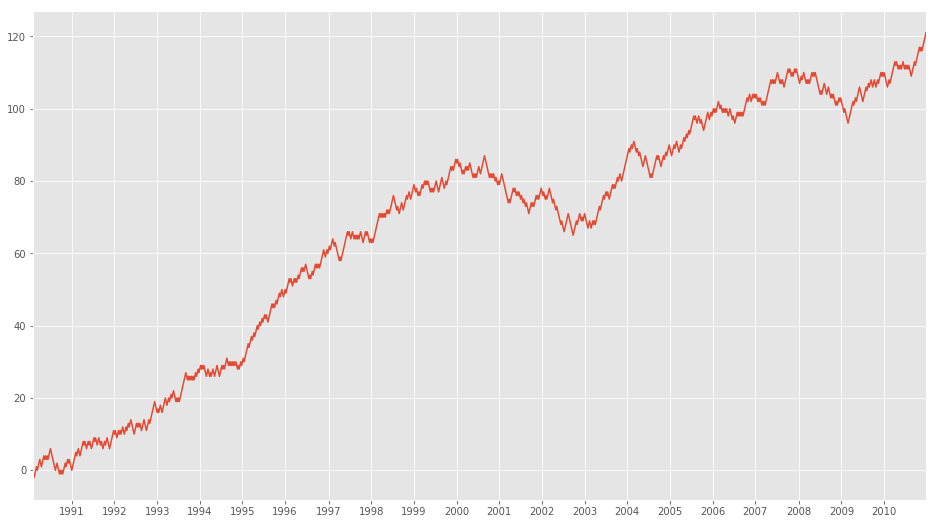

In [48]:
direction_dummies = pd.get_dummies(weekly.Direction,drop_first=True)
direction_dummies_cum = direction_dummies.replace([0],[-1]).cumsum()

fig, ax = plt.subplots(figsize=(16,9))

plt.plot(direction_dummies_cum)

plt.xticks(cum_freq_by_year, [i+1 for i in weekly.Year.unique().tolist()])

plt.xlim(min(weekly.index.values),max(weekly.index.values))

plt.show()

Here we can see clearly the moments of upwards/downwards mobility on the stock.

In [0]:
# b)

x = weekly.iloc[:,2:8]
y = pd.get_dummies(weekly.Direction,drop_first=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

y_test = y_test.values.reshape(1,-1)[0] #turn to a 1-D numpy array

In [50]:
logit = LogisticRegression(solver='lbfgs')

logit.fit(x_train,y_train)
y_hat = logit.predict(x_test)
roc_auc_score(y_test,y_hat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5243870967741935

In [51]:
from statsmodels.discrete.discrete_model import Logit

weekly_dummies = weekly
weekly_dummies.Direction = direction_dummies

smslogit = Logit.from_formula(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data=weekly_dummies)
smslogitfit = smslogit.fit()
smslogitfit.pvalues

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


Intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

We fail to reject the null hypothesis for the following variables: Lag1, Lag3, Lag4, Lag5, Volume.

Only Lag2 can be assumed to be  statistically valuable.

In [52]:
# c)


pd.crosstab(y_test,y_hat)

col_0,0,1
row_0,,
0,9,84
1,6,119


The logistic regression is classifying the result as positive too many times.

In [53]:
# d)


weekly_train_lag2 = weekly.loc[weekly.Year <= 2008]
weekly_test_lag2 = weekly.loc[weekly.Year > 2008]

x_train_lag2 = weekly_train_lag2.Lag2.values
y_train_lag2 = weekly_train_lag2.Direction

x_train_lag2 = [[i] for i in x_train_lag2] #conversion to 2-D matrix

x_test_lag2 = weekly_test_lag2.Lag2.values
y_test_lag2 = weekly_test_lag2.Direction

x_test_lag2 = [[i] for i in x_test_lag2]

logitlag2 = LogisticRegression(solver='lbfgs')

logitlag2.fit(x_train_lag2,y_train_lag2)
y_hat_lag2 = logitlag2.predict(x_test_lag2)
pd.crosstab(y_test_lag2,y_hat_lag2)

col_0,0,1
Direction,,
0,9,34
1,5,56


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

weekly_train_lag2 = weekly.loc[weekly.Year <= 2008]
weekly_test_lag2 = weekly.loc[weekly.Year > 2008]

x_train_lag2 = weekly_train_lag2.Lag2.values
y_train_lag2 = weekly_train_lag2.Direction

x_train_lag2 = [[i] for i in x_train_lag2] #conversion to 2-D matrix

x_test_lag2 = weekly_test_lag2.Lag2.values
y_test_lag2 = weekly_test_lag2.Direction

x_test_lag2 = [[i] for i in x_test_lag2]

ldalag2 = LinearDiscriminantAnalysis()

ldalag2.fit(x_train_lag2,y_train_lag2)
y_hat_lag2 = ldalag2.predict(x_test_lag2)
pd.crosstab(y_test_lag2,y_hat_lag2)

col_0,0,1
Direction,,
0,9,34
1,5,56


In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

weekly_train_lag2 = weekly.loc[weekly.Year <= 2008]
weekly_test_lag2 = weekly.loc[weekly.Year > 2008]

x_train_lag2 = weekly_train_lag2.Lag2.values
y_train_lag2 = weekly_train_lag2.Direction

x_train_lag2 = [[i] for i in x_train_lag2] #conversion to 2-D matrix

x_test_lag2 = weekly_test_lag2.Lag2.values
y_test_lag2 = weekly_test_lag2.Direction

x_test_lag2 = [[i] for i in x_test_lag2]

qdalag2 = QuadraticDiscriminantAnalysis()

qdalag2.fit(x_train_lag2,y_train_lag2)
y_hat_lag2 = qdalag2.predict(x_test_lag2)
pd.crosstab(y_test_lag2,y_hat_lag2)

col_0,1
Direction,
0,43
1,61


In [0]:
# h)

LDA and the Logistic Regression yielded similar results, QDA had way worse results. 